# Portfolio Optimization and Analysis

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import warnings

C:\Users\Sai Teja Rekha\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.4%}'.format


In [3]:
#DATE RANGE

In [4]:

start = '2016-01-01'
end = '2024-03-31'


In [5]:
#TICKERS OF ASSETS
assets = ['JCI', 'TGT', 'CMCSA', 'CPB', 'MO', 'APA', 'MMC', 'JPM',
          'ZION', 'PSA', 'BAX', 'BMY', 'LUV', 'PCAR', 'TXT', 'TMO',
          'DE', 'MSFT', 'HPQ', 'SEE', 'VZ', 'CNP', 'NI', 'T', 'BA']
assets.sort()


In [6]:
#DOWNLOAD THE DATA FROM YAHOO FINANCE
data = yf.download(assets, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = assets

[*********************100%%**********************]  25 of 25 completed


In [7]:
data.head()

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-04,3746.3982%,12600.5096%,3291.2292%,5191.3078%,2324.8816%,1372.8354%,3992.7277%,6603.5439%,891.5002%,2409.7132%,...,1496.7569%,2319.7536%,17644.7662%,3779.4544%,1389.9076%,5833.3229%,13558.6121%,4098.7289%,3052.0216%,2151.8375%
2016-01-05,3670.5078%,12651.6319%,3304.5116%,5293.5390%,2325.2989%,1385.6092%,4007.4116%,6641.7328%,899.9542%,2380.9095%,...,1520.5273%,2320.2461%,18142.9794%,3816.3368%,1399.6187%,5935.6331%,13535.1532%,4108.6044%,3093.9392%,2128.4748%
2016-01-06,3248.9014%,12450.7416%,3312.4821%,5200.6008%,2307.3315%,1368.3269%,4000.4566%,6567.0876%,867.6756%,2358.1686%,...,1528.9617%,2320.7373%,18171.8597%,3756.6231%,1403.9685%,5875.3574%,13431.5735%,3985.1490%,3065.9870%,2066.4410%
2016-01-07,3081.9460%,11928.7804%,3257.5832%,5056.5479%,2281.8434%,1341.2758%,3951.6247%,6508.9310%,827.7119%,2298.2861%,...,1495.2231%,2250.3971%,17982.6859%,3638.0772%,1381.2969%,5859.4955%,13124.7299%,3903.1742%,3049.1486%,2004.4077%
2016-01-08,3090.3782%,11657.9407%,3205.3410%,4927.9861%,2284.3502%,1338.2702%,3974.1745%,6402.1736%,813.1094%,2294.4967%,...,1492.9226%,2224.8192%,17851.2680%,3632.8075%,1382.5336%,5661.2183%,13110.0784%,3858.7307%,3019.5120%,1981.8501%


In [8]:
data.to_csv("stock_data.csv")

In [9]:
#LETS CALCULATE THE RETURNS

Y = data[assets].pct_change().dropna()

display(Y.head())

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-05,-2.0257%,0.4057%,0.4036%,1.9693%,0.0180%,0.9305%,0.3678%,0.5783%,0.9483%,-1.1953%,...,1.5881%,0.0212%,2.8236%,0.9759%,0.6987%,1.7539%,-0.1730%,0.2409%,1.3734%,-1.0857%
2016-01-06,-11.4863%,-1.5879%,0.2412%,-1.7557%,-0.7727%,-1.2473%,-0.1736%,-1.1239%,-3.5867%,-0.9551%,...,0.5547%,0.0212%,0.1592%,-1.5647%,0.3108%,-1.0155%,-0.7653%,-3.0048%,-0.9035%,-2.9145%
2016-01-07,-5.1388%,-4.1922%,-1.6573%,-2.7699%,-1.1047%,-1.9769%,-1.2207%,-0.8856%,-4.6058%,-2.5394%,...,-2.2066%,-3.0309%,-1.0410%,-3.1557%,-1.6148%,-0.2700%,-2.2845%,-2.0570%,-0.5492%,-3.0019%
2016-01-08,0.2736%,-2.2705%,-1.6037%,-2.5425%,0.1099%,-0.2241%,0.5706%,-1.6402%,-1.7642%,-0.1649%,...,-0.1539%,-1.1366%,-0.7308%,-0.1448%,0.0895%,-3.3839%,-0.1116%,-1.1387%,-0.9720%,-1.1254%
2016-01-11,-4.3384%,0.1692%,-1.6851%,-1.0215%,0.0915%,-1.1791%,0.5674%,0.5287%,0.6617%,0.0330%,...,1.6436%,0.0000%,0.9870%,-0.1451%,1.2225%,1.4570%,0.5366%,-0.4607%,0.5800%,-1.9919%


# ESTIMATING MEAN VARIANCE PORTFOLIOS

In [10]:
# Calculating the portfolio that maximizes Sharpe ratio.

In [11]:
#!pip install riskfolio-lib

In [12]:
import riskfolio as rp

In [13]:
#BUILDING PORTFOLIO
port = rp.Portfolio(returns=Y)


In [14]:
# OPTIMAL PORTFOLIO - USING HOSTORICAL DATA
method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)


In [15]:
## Estimate optimal portfolio:
model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'


In [16]:
w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)
display(w.T)


,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
weights,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,16.0479%,0.0000%,0.0000%,...,0.0000%,17.4061%,0.0000%,0.0000%,0.0000%,3.4176%,7.2475%,0.0000%,0.0000%,0.0000%


In [17]:
#With the majority having a weight of 0%, this suggests a highly concentrated portfolio that focuses investment on 
# specific assets deemed optimal by the model's criteria (in this case, maximizing the Sharpe ratio under the historical return and covariance estimates)

In [18]:
# The selected assets cover different sectors and industries, suggesting that the optimization process identifies value across diverse fields

In [19]:
#LETS PLOT PORTFOLIO COMPONENTS

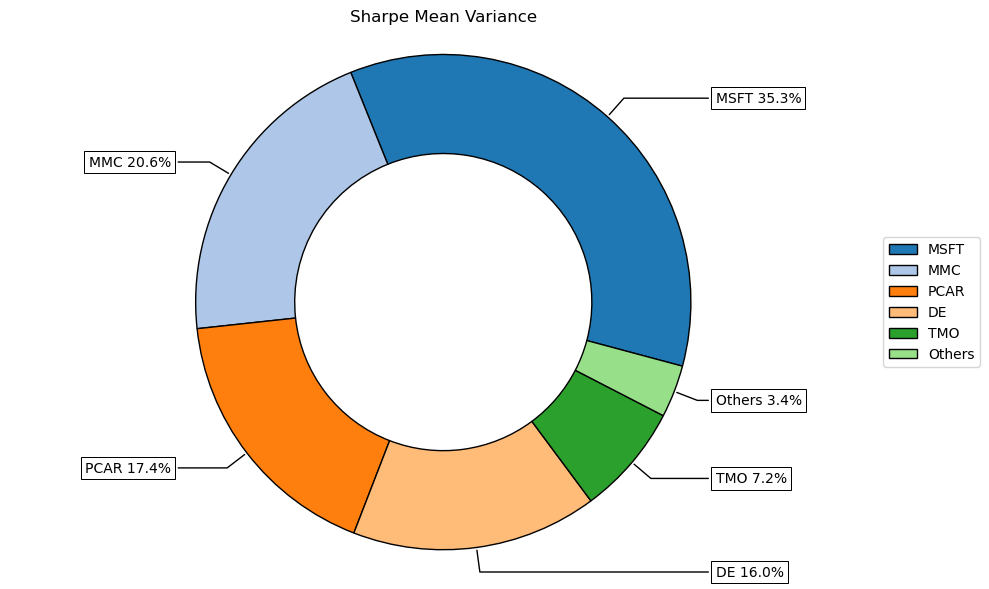

In [20]:

ax = rp.plot_pie(w=w, title='Sharpe Mean Variance', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

In [21]:
#The allocation suggests a strategy that is less concerned with spreading risk across many assets and more focused on leveraging specific opportunities.

# For investors following this model, it's essential to monitor these assets closely, as their heavy weighting will significantly influence overall portfolio performance.


In [22]:
#EFFICIENT FRONTIER

In [23]:
points = 50 # Number of points of the frontier

frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

display(frontier.T.head())

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
0,0.0000%,0.0000%,4.0699%,13.4805%,2.3865%,0.0000%,14.1786%,0.0000%,0.0000%,0.0997%,...,0.0000%,5.1124%,10.8762%,0.0000%,0.0000%,1.8681%,4.0890%,0.0000%,23.3920%,0.0000%
1,0.0000%,0.0000%,0.5759%,8.7794%,0.2862%,0.0000%,13.0967%,2.7028%,0.0000%,0.0000%,...,0.0465%,8.4195%,8.9418%,0.0000%,0.0000%,2.8208%,6.6722%,0.0000%,20.9631%,0.0000%
2,0.0000%,0.0000%,0.0000%,6.4565%,0.0000%,0.0000%,12.5989%,4.0325%,0.0000%,0.0000%,...,0.3923%,9.4995%,7.8011%,0.0000%,0.0000%,3.1389%,7.4135%,0.0000%,19.3107%,0.0000%
3,0.0000%,0.0000%,0.0000%,4.5499%,0.0000%,0.0000%,12.1821%,5.0626%,0.0000%,0.0000%,...,0.5939%,10.3032%,6.8835%,0.0000%,0.0000%,3.3775%,7.8781%,0.0000%,17.8545%,0.0000%
4,0.0000%,0.0000%,0.0000%,2.9400%,0.0000%,0.0000%,11.8292%,5.9337%,0.0000%,0.0000%,...,0.7634%,10.9829%,6.1063%,0.0000%,0.0000%,3.5791%,8.2704%,0.0000%,16.6228%,0.0000%


In [24]:
# Plotting the efficient frontier

label = 'Max Risk Adjusted Return Portfolio' # Title of point
mu = port.mu # Expected returns
cov = port.cov # Covariance matrix
returns = port.returns # Returns of the assets

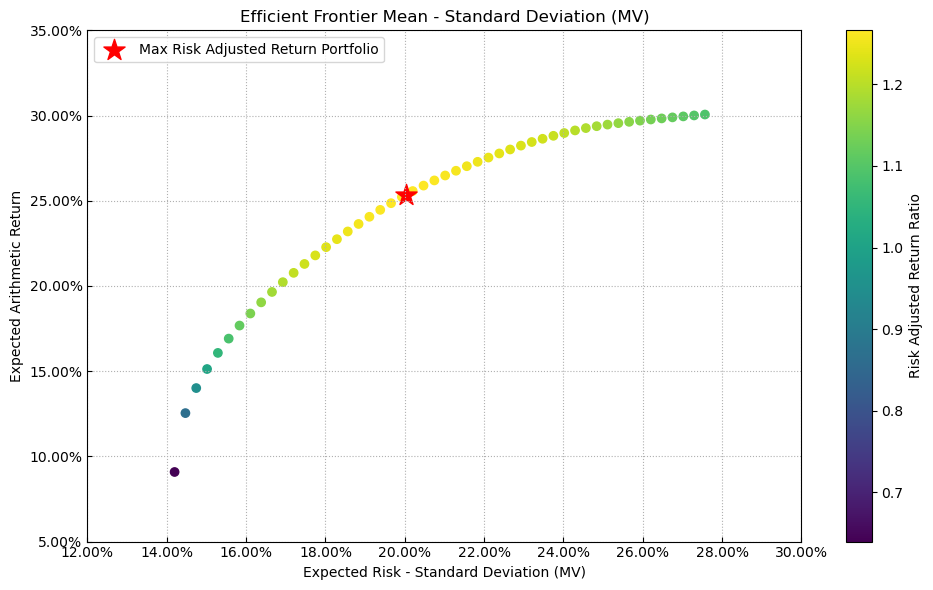

In [25]:
ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='viridis', w=w, label=label,
                      marker='*', s=16, c='r', height=6, width=10, ax=None)

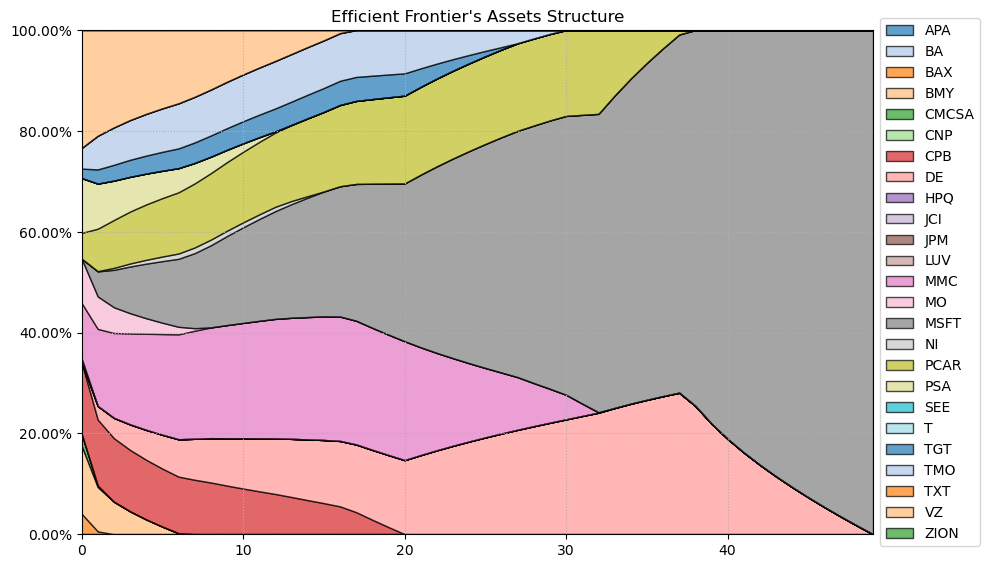

In [26]:
ax = rp.plot_frontier_area(w_frontier=frontier, cmap="tab20", height=6, width=10, ax=None)


In [27]:
#CALCULATE THE PORTFOLIO THAT MAXIMIZES RETURN/CVAR RATIO

In [28]:
rm = 'CVaR' # Risk measure

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
weights,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,12.1410%,0.0000%,0.0000%,...,0.0000%,25.5740%,0.0000%,0.0000%,0.0000%,0.0000%,6.7410%,0.0000%,0.0000%,0.0000%


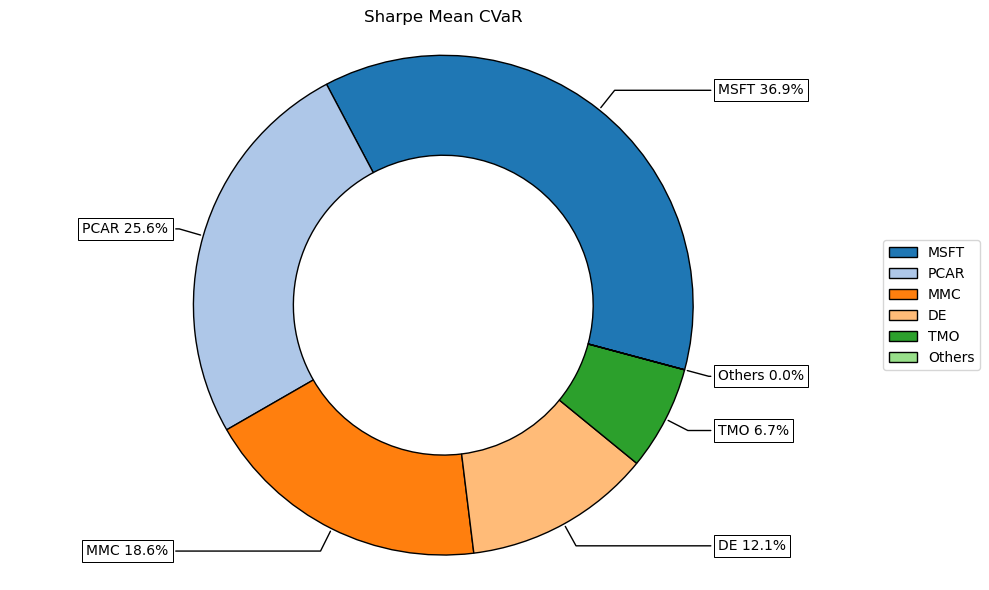

In [29]:
ax = rp.plot_pie(w=w, title='Sharpe Mean CVaR', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

In [30]:
points = 50 # Number of points of the frontier

frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

display(frontier.T.head())

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
0,0.0000%,0.0000%,0.0000%,12.1184%,6.2777%,0.0000%,15.9870%,0.0000%,0.0000%,0.0000%,...,0.0000%,6.1339%,18.5759%,0.0000%,0.0000%,4.4477%,4.0532%,0.0000%,25.1372%,0.0000%
1,0.0000%,0.0000%,0.0000%,10.1719%,2.7702%,0.0000%,16.3317%,1.1632%,0.0000%,0.0000%,...,0.0000%,9.6365%,14.1806%,0.0000%,0.0000%,6.6672%,8.2409%,0.0000%,18.8788%,0.0000%
2,0.0000%,0.0000%,0.0000%,6.4665%,0.0000%,0.0000%,15.7529%,4.5945%,0.0000%,0.0000%,...,1.0292%,9.5997%,12.9436%,0.0000%,0.0000%,5.0873%,8.4986%,0.0000%,17.6578%,0.0000%
3,0.0000%,0.0000%,0.0000%,5.3189%,0.0000%,0.0000%,15.1550%,4.9331%,0.0000%,0.0000%,...,1.6251%,9.5812%,11.5183%,0.0000%,0.0000%,5.8930%,7.6904%,0.0000%,18.1026%,0.0000%
4,0.0000%,0.0000%,0.0000%,2.5023%,0.0000%,0.0000%,15.3476%,6.4322%,0.0000%,0.0000%,...,3.8648%,11.6663%,10.0440%,0.0000%,0.0000%,4.6040%,9.5106%,0.0000%,15.6749%,0.0000%


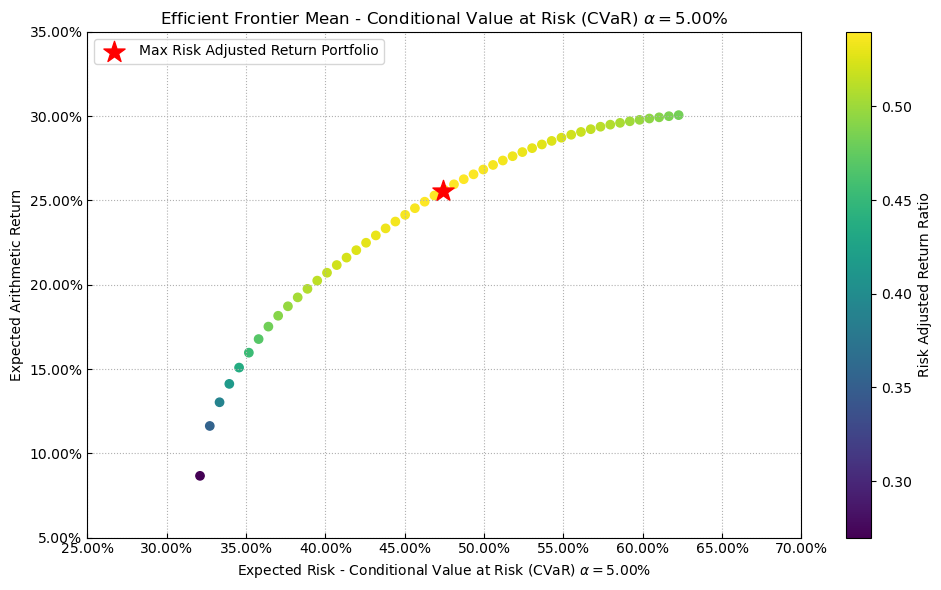

In [31]:
label = 'Max Risk Adjusted Return Portfolio' # Title of point

ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='viridis', w=w, label=label,
                      marker='*', s=16, c='r', height=6, width=10, ax=None)

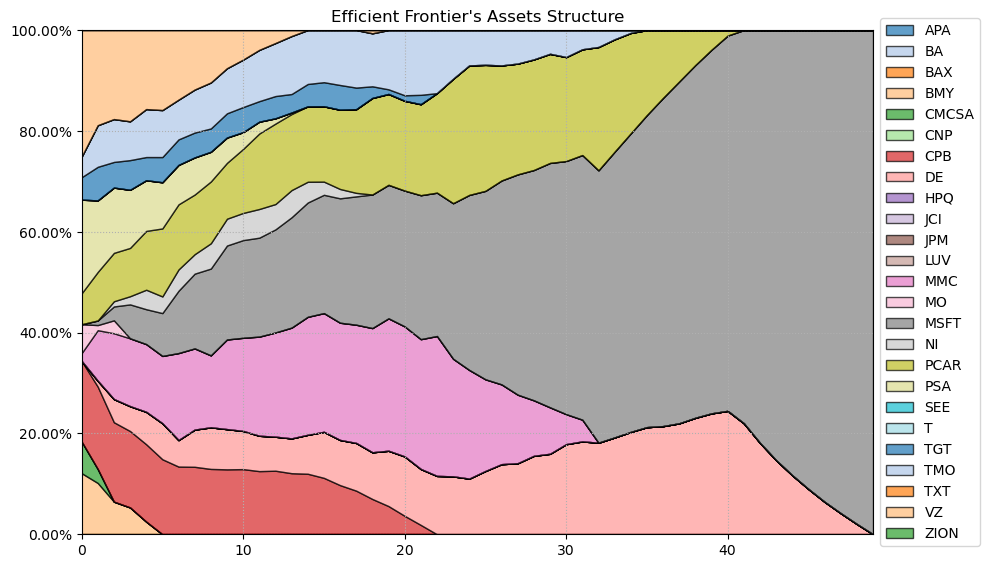

In [32]:
ax = rp.plot_frontier_area(w_frontier=frontier, cmap="tab20", height=6, width=10, ax=None)


In [33]:
#Calculate Optimal Portfolios for Several Risk Measures


In [34]:
# Risk Measures available:
#
# 'MV': Standard Deviation.
# 'MAD': Mean Absolute Deviation.
# 'MSV': Semi Standard Deviation.
# 'FLPM': First Lower Partial Moment (Omega Ratio).
# 'SLPM': Second Lower Partial Moment (Sortino Ratio).
# 'CVaR': Conditional Value at Risk.
# 'EVaR': Entropic Value at Risk.
# 'WR': Worst Realization (Minimax)
# 'MDD': Maximum Drawdown of uncompounded cumulative returns (Calmar Ratio).
# 'ADD': Average Drawdown of uncompounded cumulative returns.
# 'CDaR': Conditional Drawdown at Risk of uncompounded cumulative returns.
# 'EDaR': Entropic Drawdown at Risk of uncompounded cumulative returns.
# 'UCI': Ulcer Index of uncompounded cumulative returns.

rms = ['MV', 'MAD', 'MSV', 'FLPM', 'SLPM', 'CVaR',
       'EVaR', 'WR', 'MDD', 'ADD', 'CDaR', 'UCI', 'EDaR']

w_s = pd.DataFrame([])

for i in rms:
    w = port.optimization(model=model, rm=i, obj=obj, rf=rf, l=l, hist=hist)
    w_s = pd.concat([w_s, w], axis=1)
    
w_s.columns = rms

In [35]:
w_s.style.format("{:.2%}").background_gradient(cmap='YlGn')

,MV,MAD,MSV,FLPM,SLPM,CVaR,EVaR,WR,MDD,ADD,CDaR,UCI,EDaR
APA,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
BA,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
BAX,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
BMY,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
CMCSA,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
CNP,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
CPB,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,29.11%,28.13%,1.41%,18.33%,7.56%,26.23%
DE,16.05%,14.99%,12.32%,15.36%,12.08%,12.14%,0.00%,0.00%,0.00%,12.80%,15.71%,15.72%,13.88%
HPQ,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
JCI,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%


In [36]:
#'DE', 'MMC', 'MSFT', and 'PCAR', indicating these assets are perceived as valuable under various risk considerations. 
#This suggests a strong confidence in their risk-adjusted return profiles.

In [37]:
# The allocation changes significantly across different risk measures, illustrating how the choice of risk measure can impact portfolio construction.

In [38]:
# 'MSFT' holds a dominant position in portfolios optimized against 'MV', 'MSV'
#'SLPM', and 'CVaR', indicating its favorable risk-return profile.
#'PCAR' becomes more prominent under 'EVaR' and 'WR', suggesting it's valued for its performance under extreme risk scenarios.

In [39]:
#Measures like 'MV' focus on volatility, 'MAD' and 'MSV' capture deviations from the mean, 'SLPM' and 'FLPM' focus on downside risk, while 'CVaR' and 'EVaR' address extreme loss scenarios.
#The differences in portfolio composition reflect these underlying risk considerations.

In [40]:
#'DE' (Deere & Co): Shows consistent allocation across several risk measures, indicating its stable risk-return profile. Its absence in extreme risk measures ('EVaR', 'WR') suggests it may not perform as well under the most adverse conditions.
#'MMC' (Marsh & McLennan): Favored in scenarios optimizing against 'MAD' and 'FLPM', highlighting its potential for consistent returns with lower absolute deviations and effective performance in minimizing losses below a target level.
#MSFT' (Microsoft): Dominates in many risk measures, especially those focusing on volatility and downside risk, emphasizing its strong risk-adjusted return potential.
#PCAR' (PACCAR Inc): Preferred in 'EVaR' and 'WR', indicating its perceived resilience in worst-case scenarios. Its weight in 'CDaR' and 'UCI' is notable, pointing to its potential to limit drawdowns.

<Axes: >

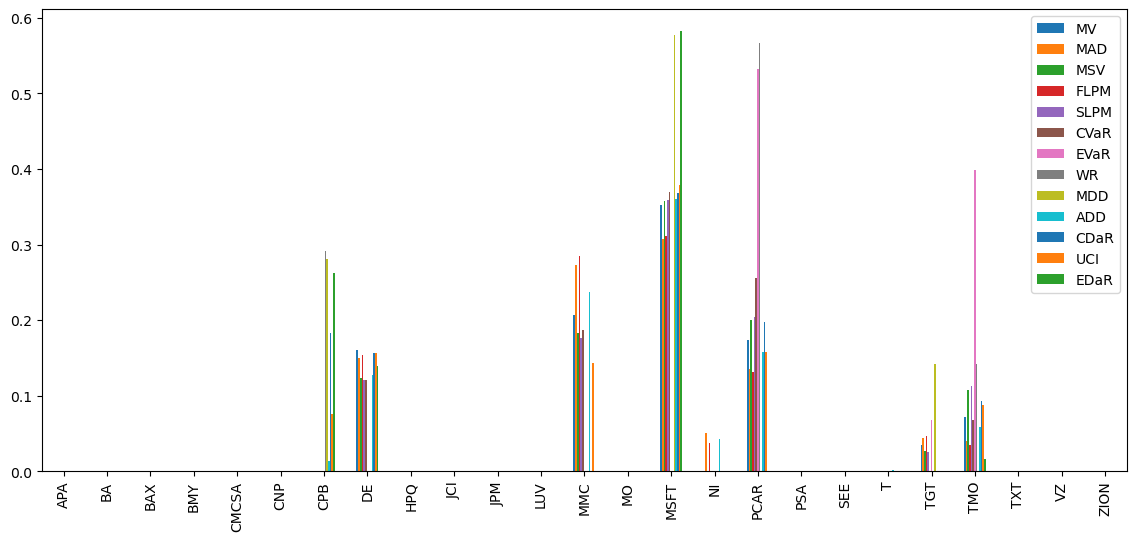

In [41]:
import matplotlib.pyplot as plt

# Plotting a comparison of assets weights for each portfolio

fig = plt.gcf()
fig.set_figwidth(14)
fig.set_figheight(6)
ax = fig.subplots(nrows=1, ncols=1)

w_s.plot.bar(ax=ax)

In [42]:
#Constraints on Assets and Assets Classes

In [43]:
asset_classes = {'Assets': ['JCI','TGT','CMCSA','CPB','MO','APA','MMC','JPM',
                            'ZION','PSA','BAX','BMY','LUV','PCAR','TXT','TMO',
                            'DE','MSFT','HPQ','SEE','VZ','CNP','NI','T','BA'], 
                 'Industry': ['Consumer Discretionary','Consumer Discretionary',
                              'Consumer Discretionary', 'Consumer Staples',
                              'Consumer Staples','Energy','Financials',
                              'Financials','Financials','Financials',
                              'Health Care','Health Care','Industrials','Industrials',
                              'Industrials','Health Care','Industrials',
                              'Information Technology','Information Technology',
                              'Materials','Telecommunications Services','Utilities',
                              'Utilities','Telecommunications Services','Financials']}

In [44]:
asset_classes = pd.DataFrame(asset_classes)
asset_classes = asset_classes.sort_values(by=['Assets'])


In [103]:
constraints = {'Disabled': [False, False, False, False, False],
               'Type': ['All Assets', 'Classes', 'Classes', 'Classes',
                        'Classes'],
               'Set': ['', 'Industry', 'Industry', 'Industry', 'Industry'],
               'Position': ['', 'Financials', 'Utilities', 'Industrials',
                            'Consumer Discretionary'],
               'Sign': ['<=', '<=', '<=', '<=', '<='],
               'Weight': [0.2, 0.2, 0.2, 0.2, 0.2],
               'Type Relative': ['', '', '', '', ''],
               'Relative Set': ['', '', '', '', ''],
               'Relative': ['', '', '', '', ''],
               'Factor': ['', '', '', '', '']}
constraints = pd.DataFrame(constraints)
display(constraints)


,Disabled,Type,Set,Position,Sign,Weight,Type Relative,Relative Set,Relative,Factor
0,False,All Assets,,,<=,20.0000%,,,,
1,False,Classes,Industry,Financials,<=,20.0000%,,,,
2,False,Classes,Industry,Utilities,<=,20.0000%,,,,
3,False,Classes,Industry,Industrials,<=,20.0000%,,,,
4,False,Classes,Industry,Consumer Discretionary,<=,20.0000%,,,,


In [104]:
A, B = rp.assets_constraints(constraints, asset_classes)


In [105]:
#Optimize the portfolio with the constraints
port.ainequality = A
port.binequality = B

model = 'Classic'
rm = 'MV'
obj = 'Sharpe'
rf = 0

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
weights,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,3.6352%,10.8094%,1.1231%,0.0000%,...,4.3954%,9.1906%,0.0000%,0.0000%,0.0000%,10.8463%,20.0000%,0.0000%,0.0000%,0.0000%


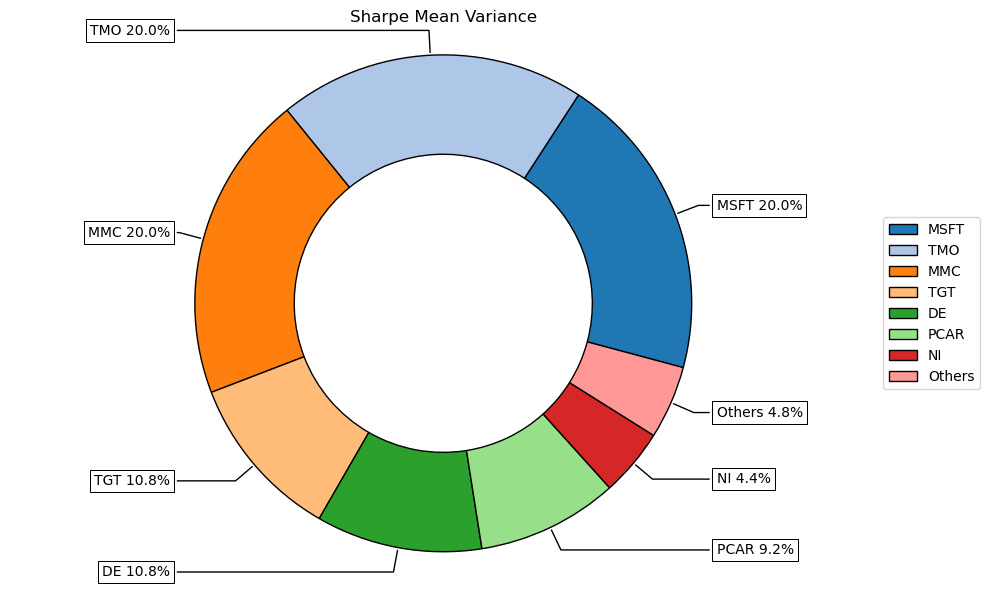

In [106]:
ax = rp.plot_pie(w=w, title='Sharpe Mean Variance', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

In [49]:
#The resulting weights are spread across several assets, with no single asset exceeding the 10% cap, which enforces diversification, mitigating the risk associated with over-concentration in any single asset.

In [50]:
#The allocation respects the sector-specific constraints, ensuring that no sector exceeds the 20% limit. This balanced allocation across different sectors reduces the portfolio's vulnerability to sector-specific downturns and volatilities.

In [51]:
#'CPB' (Campbell Soup Company), 'DE' (Deere & Company), 'HPQ' (HP Inc.), 'JCI' (Johnson Controls International), 'NI' (NiSource Inc.), 'PCAR' (PACCAR Inc), 'TGT' (Target Corporation), and 'TMO' (Thermo Fisher Scientific) are allocated the significant weights in the portfolio. 

In [52]:
#Notably, 'DE', 'PCAR', 'TGT', and 'TMO' hit the 10% cap, indicating they are likely key drivers of the portfolio's risk-adjusted performance within the constraints set.

In [53]:
#A significant number of assets have been assigned a weight of 0%, indicating they do not contribute to the optimized portfolio's objective of maximizing the Sharpe ratio within the set constraints

In [107]:
w_classes = pd.concat([asset_classes.set_index('Assets'), w], axis=1)

display(w_classes)

,Industry,weights
APA,Energy,0.0000%
BA,Financials,0.0000%
BAX,Health Care,0.0000%
BMY,Health Care,0.0000%
CMCSA,Consumer Discretionary,0.0000%
CNP,Utilities,0.0000%
CPB,Consumer Staples,3.6352%
DE,Industrials,10.8094%
HPQ,Information Technology,1.1231%
JCI,Consumer Discretionary,0.0000%


In [109]:
w_classes = w_classes.groupby(['Industry']).sum()

display(w_classes)

,weights
Industry,
Consumer Discretionary,10.8463%
Consumer Staples,3.6352%
Energy,0.0000%
Financials,20.0000%
Health Care,20.0000%
Industrials,20.0000%
Information Technology,21.1231%
Materials,0.0000%
Telecommunications Services,0.0000%


In [110]:
#he portfolio strategically balances growth and stability, favoring sectors like Financials, Industrials, and Information Technology for growth potential, alongside defensive sectors like Health Care and Utilities for risk mitigation. 
#The lack of investment in Energy and Materials may indicate a specific strategic stance or outlook on these sectors.

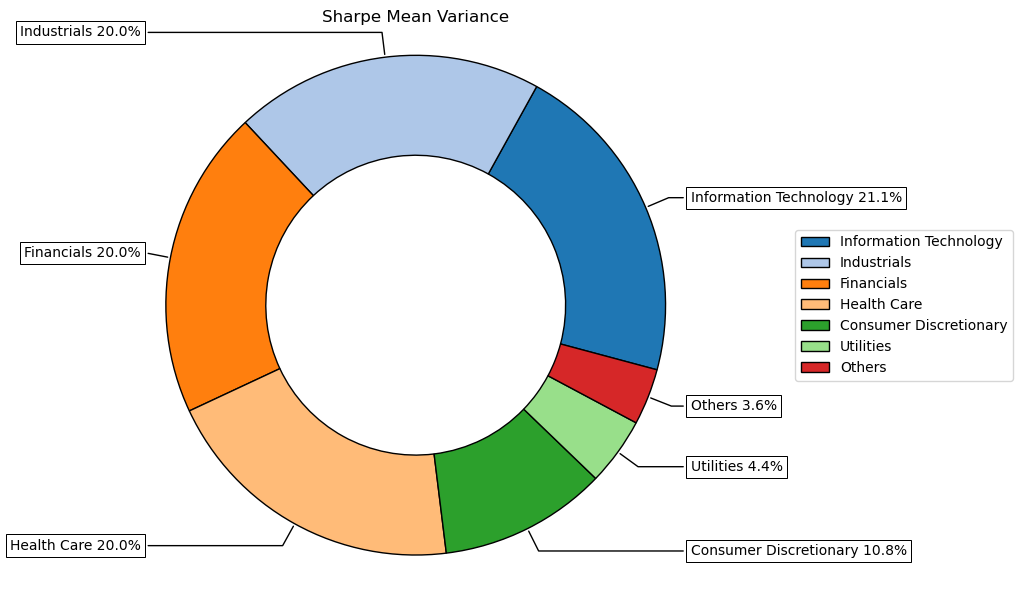

In [111]:
ax = rp.plot_pie(w=w_classes, title='Sharpe Mean Variance', others=0.05, nrow=25,
                 cmap = "tab20", height=6, width=10, ax=None)

In [112]:
#!pip install numpy pandas matplotlib seaborn scipy cvxpy riskfolio-lib


In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import cvxpy
import riskfolio as rp

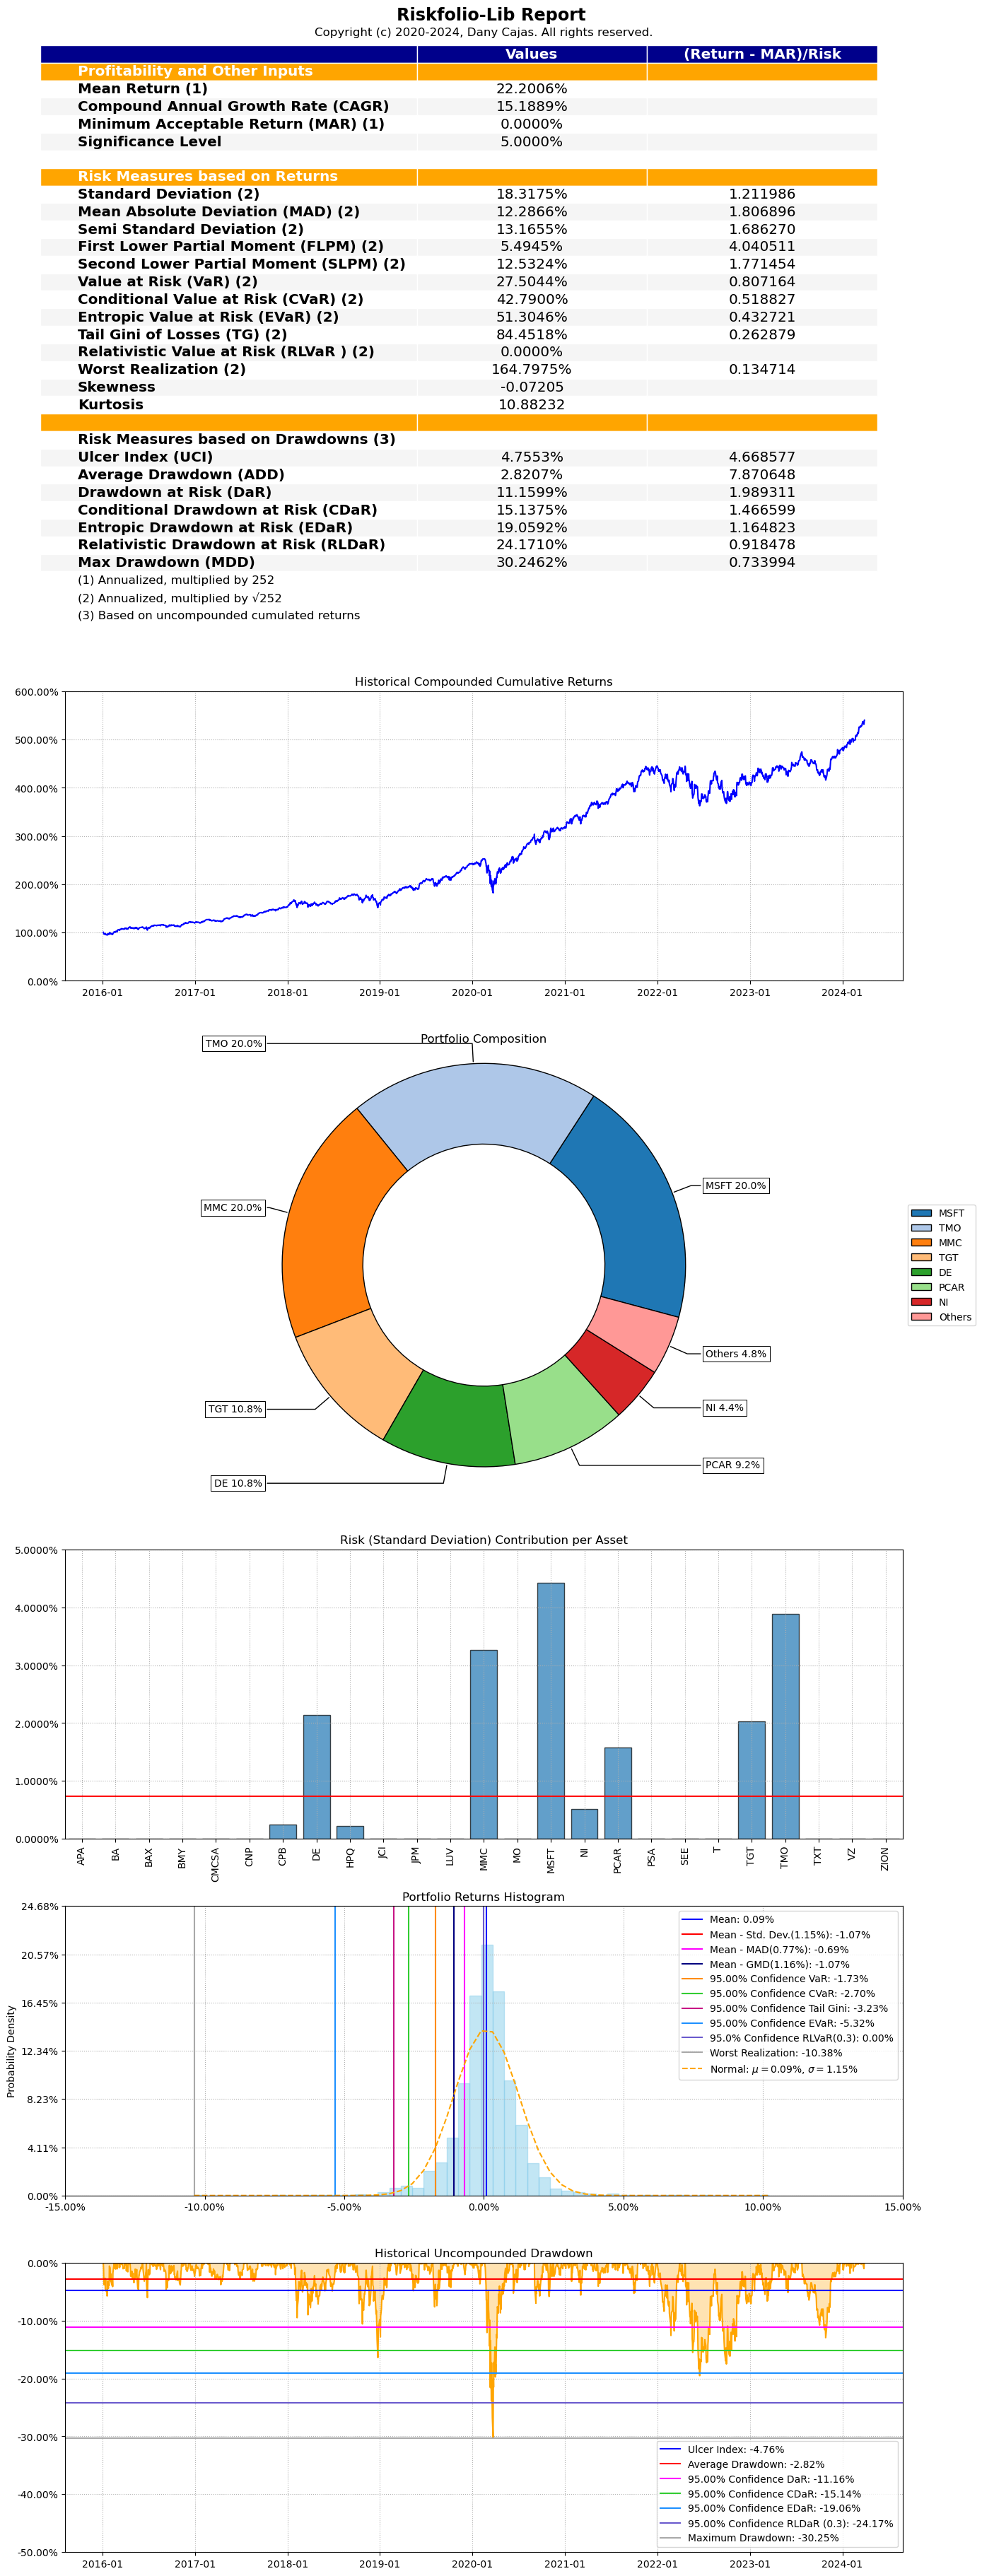

In [114]:
ax = rp.jupyter_report(returns,
                       w,
                       rm='MV',
                       rf=0,
                       alpha=0.05,
                       height=6,
                       width=14,
                       others=0.05,
                       nrow=25)

In [135]:
import pandas as pd

# Recreate the DataFrame with the updated weights
df_assets_weights = pd.DataFrame({
    'Asset': assets,
    'Allocation Percentage': weights_percentages
})

df_assets_weights


,Asset,Allocation Percentage
0,APA,0.0000%
1,BA,0.0000%
2,BAX,0.0000%
3,BMY,0.0000%
4,CMCSA,0.0000%
5,CNP,0.0000%
6,CPB,363.5200%
7,DE,1080.9400%
8,HPQ,112.3100%
9,JCI,0.0000%


In [136]:
# Adjusting the DataFrame creation to format the allocation percentages properly

df_assets_weights['Allocation Percentage'] = df_assets_weights['Allocation Percentage'] / 100  # Adjusting for proper percentage display

# Display the corrected DataFrame
print(df_assets_weights)


    Asset  Allocation Percentage
0     APA                0.0000%
1      BA                0.0000%
2     BAX                0.0000%
3     BMY                0.0000%
4   CMCSA                0.0000%
5     CNP                0.0000%
6     CPB                3.6352%
7      DE               10.8094%
8     HPQ                1.1231%
9     JCI                0.0000%
10    MMC               20.0000%
11   MSFT               20.0000%
12     NI                4.3954%
13   PCAR                9.1906%
14    TGT               10.8463%
15    TMO               20.0000%
16    TXT                0.0000%
17     VZ                0.0000%
18   ZION                0.0000%


In [137]:
# Exclude rows with 0% allocation from the DataFrame and display the updated table

df_assets_filtered = df_assets_weights[df_assets_weights['Allocation Percentage'] > 0].reset_index(drop=True)

df_assets_filtered


,Asset,Allocation Percentage
0,CPB,3.6352%
1,DE,10.8094%
2,HPQ,1.1231%
3,MMC,20.0000%
4,MSFT,20.0000%
5,NI,4.3954%
6,PCAR,9.1906%
7,TGT,10.8463%
8,TMO,20.0000%


In [141]:
import pandas as pd

# Load stock data
stock_data = pd.read_csv('stock_data.csv')
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data.set_index('Date', inplace=True)

stock_data.head()

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-04,3746.3982%,12600.5096%,3291.2292%,5191.3078%,2324.8816%,1372.8354%,3992.7277%,6603.5439%,891.5002%,2409.7132%,...,1496.7569%,2319.7536%,17644.7662%,3779.4544%,1389.9076%,5833.3229%,13558.6121%,4098.7289%,3052.0216%,2151.8375%
2016-01-05,3670.5078%,12651.6319%,3304.5116%,5293.5390%,2325.2989%,1385.6092%,4007.4116%,6641.7328%,899.9542%,2380.9095%,...,1520.5273%,2320.2461%,18142.9794%,3816.3368%,1399.6187%,5935.6331%,13535.1532%,4108.6044%,3093.9392%,2128.4748%
2016-01-06,3248.9014%,12450.7416%,3312.4821%,5200.6008%,2307.3315%,1368.3269%,4000.4566%,6567.0876%,867.6756%,2358.1686%,...,1528.9617%,2320.7373%,18171.8597%,3756.6231%,1403.9685%,5875.3574%,13431.5735%,3985.1490%,3065.9870%,2066.4410%
2016-01-07,3081.9460%,11928.7804%,3257.5832%,5056.5479%,2281.8434%,1341.2758%,3951.6247%,6508.9310%,827.7119%,2298.2861%,...,1495.2231%,2250.3971%,17982.6859%,3638.0772%,1381.2969%,5859.4955%,13124.7299%,3903.1742%,3049.1486%,2004.4077%
2016-01-08,3090.3782%,11657.9407%,3205.3410%,4927.9861%,2284.3502%,1338.2702%,3974.1745%,6402.1736%,813.1094%,2294.4967%,...,1492.9226%,2224.8192%,17851.2680%,3632.8075%,1382.5336%,5661.2183%,13110.0784%,3858.7307%,3019.5120%,1981.8501%


In [142]:
# Define portfolio allocations (ensure this matches your actual allocations)
portfolio_allocations = pd.DataFrame({
    'Asset': ['CPB', 'DE', 'HPQ', 'MMC', 'MSFT', 'NI', 'PCAR', 'TGT', 'TMO'],
    'Allocation Percentage': [3.6352, 10.8094, 1.1231, 20.0000, 20.0000, 4.3954, 9.1906, 10.8463, 20.0000]
})

# Calculate daily returns for each stock in the DataFrame
daily_returns = stock_data.pct_change()

# Filter the daily_returns DataFrame to include only the assets specified in the portfolio allocations
filtered_daily_returns = daily_returns[portfolio_allocations['Asset']]

# Display the first few rows to confirm
print(filtered_daily_returns.head())


                CPB       DE      HPQ      MMC     MSFT       NI     PCAR  \
Date                                                                        
2016-01-04      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2016-01-05  0.3678%  0.5783%  0.9483%  0.8284%  0.4562%  1.5881%  0.0212%   
2016-01-06 -0.1736% -1.1239% -3.5867% -1.2050% -1.8165%  0.5547%  0.0212%   
2016-01-07 -1.2207% -0.8856% -4.6058% -0.7577% -3.4783% -2.2066% -3.0309%   
2016-01-08  0.5706% -1.6402% -1.7642% -1.3966%  0.3067% -0.1539% -1.1366%   

                TGT      TMO  
Date                          
2016-01-04      NaN      NaN  
2016-01-05  1.7539% -0.1730%  
2016-01-06 -1.0155% -0.7653%  
2016-01-07 -0.2700% -2.2845%  
2016-01-08 -3.3839% -0.1116%  


In [144]:
# With the filtered daily returns, let's proceed to calculate the expected portfolio return, volatility, and the Sharpe Ratio.

# The risk-free rate is not provided; assuming a common risk-free rate for calculations (e.g., 2% or 0.02 annually).
risk_free_rate = 0.02

# Calculate expected portfolio return using the allocation fractions
expected_portfolio_return_daily = (filtered_daily_returns * portfolio_allocations.set_index('Asset')['Allocation Percentage']).sum(axis=1)
expected_portfolio_return_annual = expected_portfolio_return_daily.mean() * 252

# Calculate portfolio volatility (standard deviation of returns)
portfolio_volatility_annual = expected_portfolio_return_daily.std() * (252 ** 0.5)

# Calculate Sharpe Ratio
sharpe_ratio = (expected_portfolio_return_annual - risk_free_rate) / portfolio_volatility_annual

expected_portfolio_return_annual, portfolio_volatility_annual, sharpe_ratio


(22.189864364491292, 18.313121784894207, 1.210599952585821)